<a href="https://colab.research.google.com/github/shelfertmurphy/FromScratchML/blob/main/LinearRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

Linear Regression is perhaps the most basic model utilized in data science. The idea is to create a linear model that best fits a set of data points. Linear regression can be utilized to predict the value of a response variable given the value of a feature variable (or multiple feature variables). Here we implement linear regression from scratch using two different methods as described in Gilbert Strang's textbook *Linear Algebra and Learning from Data.* 

Linear regression is also called least squares regression, in that we attempt to minimize the vertical distance from points in the data set to the line given by our model. This is dubbed "least squares" because we are minimizing the sum of the squares of the distances. Using linear algebra terminology, we are searching for the $x$ that makes $||b-Ax||^2$ as small as possible. 

First, we find this $x$ by computing the pseudoinverse of $A,$ denoted by $A^+.$ We can use the numpy linear algebra package to compute this. A pseudoinverse is similar to the inverse of a matrix, except we can find a pseudoinverse for matrices which are not directly invertible. It turns out that the least squares solution to $Ax=b$ is $x=A^+b.$ See Strang's textbook for more information on this. 

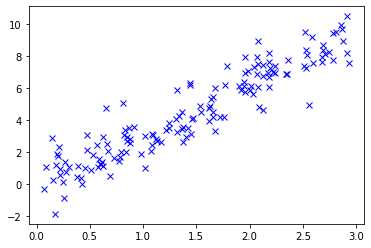

In [10]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(3)

# generate sample with error
x = 3 * np.random.rand(150) # between 0 and 3
e = 1 * np.random.randn(x.size) # noise
#y = (3*x) + e;  plot(x,y,'bo');
y = 3*x + e
plt.plot(x,y,'bx')

# create linear model f(x) = w0 + w1x
#A has x.size rows and 2 columns
#A has ones in first column, put x values in second column
A = np.ones((x.size,2));
A[:,1] = x

[-0.07791778  3.13828202]


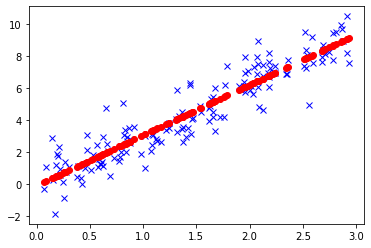

In [13]:
# Find pseudoinverse
Apinv = np.linalg.pinv(A)
#calculate least squares solution
LSsol_1 = Apinv.dot(y)
print(LSsol_1)
H = A.dot(Apinv) # projection matrix 
yHat = H.dot(y)
plt.plot(x,y,'bx');
plt.plot(x,yHat,'ro');

Next, we compute the solution to least squares by using QR matrix decomposition, which again can be computed through the numpy linear algebra package. QR decomposition rewrites the matrix $A$ as $A=QR,$ where $Q$ consists of the independent columns from $A$ orthogonalized and normalized, and $R$ is a diagonal matrix formed by the inner products of entries from $Q$ and entries from $A.$ The Gram-Schmidt process can be used to generate this matrix, but here we use numpy. The least squares solution is $x=R^{-1}Q^Tb,$ where again more information can be found in Strang's work. 

[-0.07791778  3.13828202]


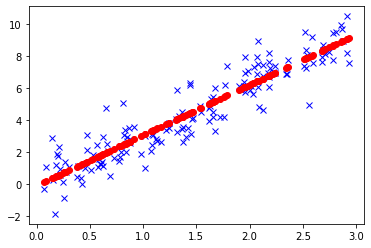

In [12]:
# Using QR
q, r = np.linalg.qr(A);
LSsol_2 = np.linalg.solve(r, q.T.dot(y))
print(LSsol_2)
yHat = A.dot(LSsol_2)
y_residue1 = y - yHat
plt.plot(x,y,'bx');
plt.plot(x,yHat,'ro');